BLU14 is important!

* Instructions: https://docs.google.com/document/d/108Ux46Wczi6N0ey4BR-WBay-lNNhFPSPbdDQuETGIA0/edit#
* Email with responses: https://docs.google.com/document/d/1gQtFWo5hfP507hdX3ly0ZmPhpQd1eRodiMUr-1M7cIU/edit#
* Report rules: https://docs.google.com/spreadsheets/d/17qp-nz45RLLcK3KtljOLs4VEhQ0KzTaIWiddYTwgB_A/edit#gid=767562645

Githubs with batch-4 challanges
* https://github.com/tiagobluefernandes/LDSSA-BATCH4-CAPSTONE
* https://github.com/dbsousa01/Batch4-Capstone
* https://github.com/fernandamcohen/PredictiveModel_with_API-LDSSA4_Capstone
* https://github.com/felixbrunner/capstone

Similar solved problems
* https://towardsdatascience.com/predicting-hospital-readmission-for-patients-with-diabetes-using-scikit-learn-a2e359b15f0
* https://towardsdatascience.com/predicting-inpatient-length-of-stay-at-hospitals-using-python-big-data-304e79d8c008

### TO-DO

* Validar diferenças no tratamento de insured vs uninsured patients
* Validar descriminação
* Ter atenção à evolução temporal dos doentes ("training and changes of staff may impact data over time")

### Perguntas



* What are the current guidelines on for patient discharge?
* Why are there so few records on the patient's weight? As you mentioned people tend to overeat, and it has an impact on diabetes
* On the admission type code, what's the difference between 'Emergency' and 'Urgent'. And what does an 'elective' admission mean?
    '1': 'Emergency',
    '2': 'Urgent',
    '3': 'Elective',
    '4': 'Newborn',
    '5': UNKNOWN_CATEGORY, # 'Not Available',
    '6': UNKNOWN_CATEGORY, # 'NULL'
    '7': 'Trauma Center',
    '8': UNKNOWN_CATEGORY # 'Not Mapped'
    


Hello, Agnes Crumplebottom,

In order to better understand the problems your hospital is facing, I would like to ask you a few questions regarding the data you provided:

1. You mentioned that 'when confined, people still tend to overeat' and weight seems like an important metric to take into account regarding diabetes. Why only a small fraction of the patients (5%) have this type of information?

2. What distiguishes 'Urgent' and 'Emergency' admission codes? Furthermore, what distigueshes 'Not Available', 'Null' and 'Not Mapped' admission codes.

3. You mention that you 'don't have the monetary, personal and infrastructural resources to retain all patients indefinitely', which I understand perfectly. Thus, which of the following scnearios should the API I'm developing focus on: 
* To make sure that all patients that may be readmitted within 30 days are not dismissed, at the expense of some false-positive patients that could otherwise be dismissed. 
* To make sure that all patients that won't be readmitted are dismissed as soon as possible, at the expense of a few erroneous dismissals.
In other words is it more expensive to keep extra patients for a while or to dismiss a patient that is readmitted within 30 days?


I'm looking forward for your reply and I'm available for any questions that you may have.

Best Regards,
Rafael Gil




## Data Cleaning

In [106]:
import os
import sys
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg

%matplotlib inline

In [2]:
df = pd.read_csv(os.path.join("data", "train_data.csv"))

In [108]:
df.describe()

,admission_id,patient_id,admission_type_code,discharge_disposition_code,admission_source_code,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,hemoglobin_level
count,81412.000000,8.141200e+04,80250.000000,80841.000000,81412.000000,81412.000000,79919.000000,81412.000000,78734.000000,81412.000000,81412.000000,81412.000000,81412.000000,81412.000000
mean,40705.500000,1.086395e+08,2.024598,3.711260,5.750123,4.395924,43.071197,1.341768,16.024424,0.370953,0.197588,0.637793,7.421965,14.192328
std,23501.764395,7.732453e+07,1.446015,5.273755,4.063456,2.975844,19.630405,1.708465,8.107235,1.278538,0.881290,1.265472,1.931480,1.060000
min,0.000000,1.980000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,10.500000
25%,20352.750000,4.683906e+07,1.000000,1.000000,1.000000,2.000000,32.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,13.400000
50%,40705.500000,9.083437e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,14.100000
75%,61058.250000,1.751117e+08,3.000000,3.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,15.000000
max,81411.000000,3.790052e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,64.000000,21.000000,16.000000,18.600000


In [4]:
df.dtypes

admission_id                     int64
patient_id                       int64
race                            object
gender                          object
age                             object
weight                          object
admission_type_code            float64
discharge_disposition_code     float64
admission_source_code            int64
time_in_hospital                 int64
payer_code                      object
medical_specialty               object
has_prosthesis                    bool
complete_vaccination_status     object
num_lab_procedures             float64
num_procedures                   int64
num_medications                float64
number_outpatient                int64
number_emergency                 int64
number_inpatient                 int64
diag_1                          object
diag_2                          object
diag_3                          object
number_diagnoses                 int64
blood_type                      object
hemoglobin_level         

In [5]:
df_clean = df.copy()

In [6]:
## Utils
UNKNOWN_CATEGORY = 'unknown'

def get_categorical(value, mapping, default = UNKNOWN_CATEGORY):
    try:
        return mapping[str(value).lower()]
    except:
        return default

In [ ]:
known_categories = {
    
}

###### admission_id

In [7]:
df.shape

(81412, 34)

In [8]:
df.admission_id.nunique()

81412

In [9]:
# AdmissionID can be used as an index, since all its values are unique
# Furthemore, there is no predictive value in it since it is used as an admission identifier
df_clean = df_clean.set_index('admission_id')

###### patient_id

In [10]:
## PatientID is also an identifier, thus it does not have any predictive value.
total_patients = df.patient_id.nunique()
returning_patients = (df.groupby('patient_id').size() > 1).sum()
"{} out of {} unique patients visited the Hospital more than once".format(returning_patients, total_patients)

'12647 out of 60069 unique patients visited the Hospital more than once'

###### race

In [121]:
# There are duplicated categories, such as 
# * 'AFRICANAMERICAN'
# * 'African American'
# * 'AfricanAmerican'
# * 'Afro American'
# These must be merged into the same category

# There are also unknown values, we should create a category for these

df.groupby('race').size()

race
?                    1827
AFRICANAMERICAN       156
African American     3067
AfricanAmerican      9209
Afro American        1411
Asian                 517
Black                1545
Caucasian           48733
EURO                  587
European             2491
Hispanic             1305
Latino                322
Other                1180
WHITE                3047
White                6015
dtype: int64

In [122]:
df.race.isnull().sum()

0

In [123]:
race_mapping = {
    'caucasian': 'white',
    'euro': 'white',
    'black': 'black',
    'other': 'other',
    'white': 'white',
    'africanamerican': 'black',
    'afro american': 'black',
    'african american': 'black',
    '?': np.nan,
    'european': 'white',
    'asian': 'asian',
    'hispanic': 'hispanic',
    'latino': 'hispanic',
}

In [124]:
df_clean['race'] = df.race.apply(lambda x: get_categorical(x, race_mapping, "unknown")).astype("category")

In [125]:
df_clean.race.isnull().sum()

1827

###### gender

In [15]:
df.groupby('gender').size()

gender
Female             43719
Male               37691
Unknown/Invalid        2
dtype: int64

In [16]:
df.gender.isnull().sum()

0

In [17]:
gender_mapping = {
    'female': 'femal',
    'male': 'male',
    'Unknown/Invalid': UNKNOWN_CATEGORY
}

In [18]:
df_clean['gender'] = df.gender.apply(lambda x: get_categorical(x, gender_mapping, "unknown")).astype("category")

###### age

In [19]:
df.groupby('age').size()

age
[0-10)        136
[10-20)       537
[20-30)      1297
[30-40)      2964
[40-50)      7498
[50-60)     13414
[60-70)     17414
[70-80)     20261
[80-90)     13383
[90-100)     2172
dtype: int64

In [20]:
df.age.isnull().sum()

2336

In [21]:
age_mapping = {
    '[0-10)': 0,
    '[10-20)': 10,
    '[20-30)': 20,
    '[30-40)': 30,
    '[40-50)': 40,
    '[50-60)': 50,
    '[60-70)': 60,
    '[70-80)': 70,
    '[80-90)': 80,
    '[90-100)': 90
}

In [22]:
df_clean['age'] = df.age.apply(lambda x: get_categorical(x, age_mapping, None)).astype("Int64")

In [23]:
df_clean.groupby('age').size()

age
0       136
10      537
20     1297
30     2964
40     7498
50    13414
60    17414
70    20261
80    13383
90     2172
dtype: int64

In [24]:
# There are still entries with null age entries
# They should be inputed afterwards, depending on the chosen strategy
df_clean.age.isnull().sum()

2336

###### weight

In [25]:
# There are a lot of nulls/unknowns for the weight

df.groupby('weight').size()

weight
>200             3
?            77353
[0-25)          40
[100-125)      482
[125-150)      117
[150-175)       27
[175-200)        8
[25-50)         72
[50-75)        713
[75-100)      1037
dtype: int64

In [26]:
non_null_weight_count = (df.weight != '?').sum()

"Only {} out of {} ({}%) weight entries are known".format(non_null_weight_count, df.shape[0], round(non_null_weight_count / df.shape[0] * 100, 2))


'Only 4059 out of 81412 (4.99%) weight entries are known'

In [27]:
weight_mapping = {
    '>200': 200,
    '?': None,
    '[0-25)': 0,
    '[100-125)': 100,
    '[125-150)': 125,
    '[150-175)': 150,
    '[175-200)': 175,
    '[25-50)': 25,
    '[50-75)': 50,
    '[75-100)': 75
}

df_clean['weight'] = df.weight.apply(lambda x: get_categorical(x, weight_mapping, None)).astype("Int64")

# Since there are so little entries available, 
# Converting this column into a boolean stating if the weight is available or not
df_clean['has_weight'] = df_clean.weight != '?'

###### admission_type_code

In [28]:
df.groupby('admission_type_code').size()

admission_type_code
1.0    42562
2.0    14576
3.0    14884
4.0        8
5.0     3768
6.0     4182
7.0       16
8.0      254
dtype: int64

In [29]:
df.admission_type_code.isnull().sum()

1162

In [30]:
admission_type_code_mapping = {
    '1': 'Emergency',
    '2': 'Emergency', # 'Urgent', Assuming, urgent is the same as emergency
    '3': 'Elective',
    '4': 'Newborn',
    '5': UNKNOWN_CATEGORY, # 'Not Available',
    '6': UNKNOWN_CATEGORY, # 'NULL'
    '7': 'Trauma Center',
    '8': UNKNOWN_CATEGORY # 'Not Mapped'
}

In [31]:
df_clean['admission_type_code'] = (df.admission_type_code
                                   .fillna(6) # Fill nulls with NULL entry
                                   .astype('int64')
                                   .apply(lambda x: get_categorical(str(x), admission_type_code_mapping))
                                   .astype("category"))

In [32]:
df_clean.groupby('admission_type_code').size()

admission_type_code
Elective         14884
Emergency        57138
Newborn              8
Trauma Center       16
unknown           9366
dtype: int64

###### discharge_disposition_code

In [33]:
df.groupby('discharge_disposition_code').size()

discharge_disposition_code
1.0     47854
2.0      1690
3.0     11097
4.0       650
5.0       936
6.0     10244
7.0       506
8.0        85
9.0        18
10.0        5
11.0     1312
12.0        2
13.0      314
14.0      294
15.0       51
16.0        7
17.0       12
18.0     2912
19.0        5
22.0     1580
23.0      324
24.0       40
25.0      793
27.0        4
28.0      106
dtype: int64

In [34]:
df.discharge_disposition_code.isnull().sum()

571

In [35]:
discharge_disposition_code_mapping = {
    '1': 'Discharged to home',
    '2': 'Discharged/transferred to another short term hospital',
    '3': 'Discharged/transferred to SNF',
    '4': 'Discharged/transferred to ICF',
    '5': 'Discharged/transferred to another type of inpatient care institution',
    '6': 'Discharged/transferred to home with home health service',
    '7': 'Left AMA',
    '8': 'Discharged/transferred to home under care of Home IV provider',
    '9': 'Admitted as an inpatient to this hospital',
    '10': 'Neonate discharged to another hospital for neonatal aftercare',
    '11': 'Expired',
    '12': 'Still patient or expected to return for outpatient services',
    '13': 'Hospice / home',
    '14': 'Hospice / medical facility',
    '15': 'Discharged/transferred within this institution to Medicare approved swing bed',
    '16': 'Discharged/transferred/referred another institution for outpatient services',
    '17': 'Discharged/transferred/referred to this institution for outpatient services',
    '18': UNKNOWN_CATEGORY, #'NULL',
    '19': 'Expired at home. Medicaid only: hospice',
    '20': 'Expired in a medical facility. Medicaid only: hospice',
    '21': 'Expired: place unknown. Medicaid only: hospice',
    '22': 'Discharged/transferred to another rehab fac including rehab units of a hospital',
    '23': 'Discharged/transferred to a long term care hospital',
    '24': 'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare',
    '25': UNKNOWN_CATEGORY, #'Not Mapped',
    '26': UNKNOWN_CATEGORY, #'Unknown/Invalid',
    '30': 'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere',
    '27': 'Discharged/transferred to a federal health care facility',
    '28': 'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
    '29': 'Discharged/transferred to a Critical Access Hospital (CAH)',
}

In [36]:
df_clean['discharge_disposition_code'] = (df.discharge_disposition_code
                                          .fillna(26)
                                          .astype('int64')
                                          .apply(lambda x: get_categorical(str(x), discharge_disposition_code_mapping))
                                          .astype("category")
                                         )

###### admission_source_code

In [37]:
df.groupby('admission_source_code').size()

admission_source_code
1     23684
2       878
3       148
4      2581
5       681
6      1819
7     45942
8        15
9        99
10        6
11        2
13        1
14        2
17     5412
20      130
22       10
25        2
dtype: int64

In [38]:
admission_source_code_mapping = {
    '1': 'Physician Referral',
    '2': 'Clinic Referral',
    '3': 'HMO Referral',
    '4': 'Transfer from a hospital',
    '5': 'Transfer from a Skilled Nursing Facility (SNF)',
    '6': 'Transfer from another health care facility',
    '7': 'Emergency Room',
    '8': 'Court/Law Enforcement',
    '9': UNKNOWN_CATEGORY, #'Not Available',
    '10': 'Transfer from critial access hospital',
    '11': 'Normal Delivery',
    '12': 'Premature Delivery',
    '13': 'Sick Baby',
    '14': 'Extramural Birth',
    '15': UNKNOWN_CATEGORY, # 'Not Available',
    '17': UNKNOWN_CATEGORY, # 'NULL',
    '18': 'Transfer From Another Home Health Agency',
    '19': 'Readmission to Same Home Health Agency',
    '20': UNKNOWN_CATEGORY, # 'Not Mapped',
    '21': UNKNOWN_CATEGORY, #'Unknown/Invalid',
    '22': 'Transfer from hospital inpt/same fac reslt in a sep claim',
    '23': 'Born inside this hospital',
    '24': 'Born outside this hospital',
    '25': 'Transfer from Ambulatory Surgery Center',
    '26': 'Transfer from Hospice',
}


In [39]:
df_clean['admission_source_code'] = (df.admission_source_code
                                     .apply(lambda x: get_categorical(str(x), admission_source_code_mapping))
                                     .astype("category")
                                     )

In [40]:
df_clean.groupby('admission_source_code').size()

admission_source_code
Clinic Referral                                                878
Court/Law Enforcement                                           15
Emergency Room                                               45942
Extramural Birth                                                 2
HMO Referral                                                   148
Normal Delivery                                                  2
Physician Referral                                           23684
Sick Baby                                                        1
Transfer from Ambulatory Surgery Center                          2
Transfer from a Skilled Nursing Facility (SNF)                 681
Transfer from a hospital                                      2581
Transfer from another health care facility                    1819
Transfer from critial access hospital                            6
Transfer from hospital inpt/same fac reslt in a sep claim       10
unknown                                 

###### time_in_hospital

In [41]:
# Everything looks fine regarding this variable
df.groupby('time_in_hospital').size()

time_in_hospital
1     11302
2     13723
3     14223
4     11228
5      7975
6      6059
7      4717
8      3528
9      2372
10     1886
11     1488
12     1153
13      944
14      814
dtype: int64

In [42]:
df.time_in_hospital.isna().sum()

0

###### payer_code

In [43]:
df.groupby('payer_code').size()

payer_code
?     32278
BC     3718
CH      124
CM     1551
CP     2053
DM      442
FR        1
HM     4973
MC    25952
MD     2824
MP       69
OG      795
OT       80
PO      469
SI       47
SP     4003
UN     1925
WC      108
dtype: int64

In [44]:
df.payer_code.isnull().sum()

0

In [45]:
df_clean['payer_code'] = (df.payer_code
                         .apply(lambda x: UNKNOWN_CATEGORY if x == '?' else x)
                         .astype("category")
                         )

###### medical_specialty

In [46]:
df.medical_specialty.unique()

array(['?', 'Emergency/Trauma', 'InternalMedicine',
       'Family/GeneralPractice', 'Radiologist', 'Orthopedics',
       'Cardiology', 'PhysicalMedicineandRehabilitation',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Surgery-Thoracic',
       'Surgery-Vascular', 'Hematology/Oncology', 'Osteopath',
       'ObstetricsandGynecology', 'Pediatrics', 'Nephrology',
       'Otolaryngology', 'Urology', 'Surgery-General',
       'Anesthesiology-Pediatric', 'Surgery-Cardiovascular/Thoracic',
       'Gastroenterology', 'Pulmonology', 'Oncology', 'Podiatry',
       'Surgery-Neuro', 'Pediatrics-Endocrinology', 'Neurology',
       'Obstetrics', 'Endocrinology', 'PhysicianNotFound', 'Hospitalist',
       'Pathology', 'Surgery-Pediatric', 'Radiology', 'Surgery-Plastic',
       'Pediatrics-CriticalCare', 'Psychology',
       'Psychiatry-Child/Adolescent', 'Ophthalmology',
       'Surgery-Cardiovascular', 'Pediatrics-Pulmonology', 'DCPTEAM',
       'Obsterics&Gynecology-GynecologicOnco', 'Surgeon

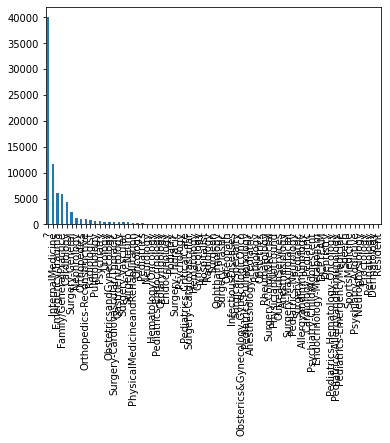

In [47]:
df.medical_specialty.value_counts().plot(kind='bar');
#plt.xlabel('Race');
#plt.ylabel('Count');

In [113]:
print((df.medical_specialty.value_counts() / df.shape[0] * 100).to_string())

?                                       49.157372
InternalMedicine                        14.386086
Emergency/Trauma                         7.395716
Family/GeneralPractice                   7.294993
Cardiology                               5.248612
Surgery-General                          3.037636
Nephrology                               1.595588
Orthopedics                              1.351152
Orthopedics-Reconstructive               1.204982
Radiologist                              1.121456
Pulmonology                              0.859824
Psychiatry                               0.827888
Urology                                  0.662065
ObstetricsandGynecology                  0.652238
Surgery-Cardiovascular/Thoracic          0.647325
Gastroenterology                         0.571169
Surgery-Vascular                         0.538004
Surgery-Neuro                            0.458163
PhysicalMedicineandRehabilitation        0.366039
Oncology                                 0.343930


In [48]:
df_clean['medical_specialty'] = (df.medical_specialty
                                 .apply(lambda x: np.nan) #UNKNOWN_CATEGORY if x == '?' else x)
                                 .astype("category")
                                 )

In [49]:
df_clean.groupby('medical_specialty').size()

Series([], dtype: int64)

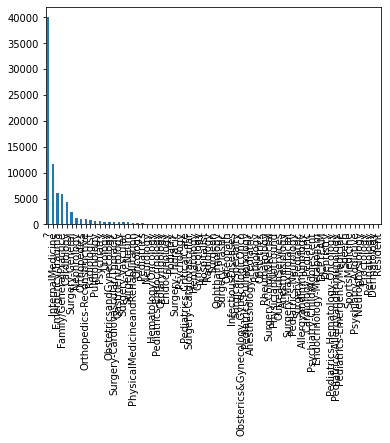

In [50]:
df.medical_specialty.value_counts().plot(kind='bar');

###### has_prosthesis

In [126]:
df.has_prosthesis.value_counts()

False    80550
True       862
Name: has_prosthesis, dtype: int64

In [127]:
df.has_prosthesis.isnull().sum()

0

In [129]:
df.has_prosthesis.dtypes

dtype('bool')

###### complete_vaccination_status

In [52]:
df.groupby('complete_vaccination_status').size()

complete_vaccination_status
Complete      67114
Incomplete    13978
None            320
dtype: int64

In [53]:
df.complete_vaccination_status.isnull().sum()

0

In [54]:
complete_vaccination_status_mapping = {
    'none': 'none',
    'incomplete': 'incomplete',
    'complete': 'complete'
}

In [55]:
df_clean['complete_vaccination_status'] = (df.complete_vaccination_status
                                           .apply(lambda x: get_categorical(x, complete_vaccination_status_mapping))
                                           .astype(pd.CategoricalDtype(['none', 'incomplete', 'complete'], ordered=True))
                                          )

###### num_lab_procedures

In [56]:
df_clean['num_lab_procedures'] = df.num_lab_procedures.astype("Int64")

In [131]:
df.num_lab_procedures.isnull().sum()

1493

###### num_procedures

In [57]:
# There are no null values, no pre processing is required
df.num_procedures.isnull().sum()

0

###### num_medications

In [58]:
df.num_medications.isnull().sum()

2678

In [59]:
df_clean['num_medications'] = df.num_medications.astype("Int64")

###### number_outpatient

In [60]:
# Outpatient - A patient whose treatment does not require an overnight stay in a hospital or clinic.
# There are no null values, no pre processing is required
df.number_outpatient.isnull().sum()

0

###### number_emergency

In [61]:
# There are no null values, no pre processing is required
df.number_emergency.isnull().sum()

0

###### number_inpatient

In [62]:
# There are no null values, no pre processing is required
df.number_inpatient.isnull().sum()

0

###### diag_1, diag_2, diag_3

In [63]:
# Maybe we could merge the codes into their categories from:
# https://en.wikipedia.org/wiki/List_of_ICD-9_codes

unique_diags = df.diag_1.append(df.diag_2).append(df.diag_3).str.lower().unique()

diag_mapping = {}
for diag in unique_diags:
    diag_mapping[str(diag).lower()] = diag

diag_category = pd.CategoricalDtype(list(diag_mapping.keys()), ordered=False)

In [64]:
df_clean['diag_1'] = (df.diag_1
                      .apply(lambda x: get_categorical(str(x), diag_mapping))
                      .astype(diag_category)
                     )

df_clean['diag_2'] = (df.diag_2
                      .apply(lambda x: get_categorical(str(x), diag_mapping))
                      .astype(diag_category)
                     )

df_clean['diag_3'] = (df.diag_3
                      .apply(lambda x: get_categorical(str(x), diag_mapping))
                      .astype(diag_category)
                     )

###### number_diagnoses

In [65]:
# There are no null values, no pre processing is required
df.number_diagnoses.isnull().sum()

0

###### blood_type

In [66]:
df.groupby('blood_type').size()

blood_type
A+     24744
A-      4826
AB+     2619
AB-      779
B+      9218
B-      1484
O+     32053
O-      5689
dtype: int64

In [67]:
blood_type_mapping = {
    'a+': 'A+',
    'a-': 'A-',
    'ab+': 'AB+',
    'ab-': 'AB-',
    'b+': 'B+',
    'b-': 'B-',
    'o+': 'O+',
    'o-': 'O-',
}

In [68]:
df_clean['blood_type'] = (df.blood_type
                          .apply(lambda x: get_categorical(x, blood_type_mapping))
                          .astype("category")
                         )

###### hemoglobin_level

In [69]:
df.groupby('hemoglobin_level').size()

hemoglobin_level
10.5    2
10.8    2
10.9    3
11.0    5
11.1    3
       ..
17.9    2
18.0    1
18.1    2
18.2    2
18.6    1
Length: 77, dtype: int64

In [70]:
df.hemoglobin_level.isnull().sum()

0

###### blood_transfusion

In [71]:
df.blood_transfusion.isnull().sum()

0

In [72]:
df.groupby('blood_transfusion').size()

blood_transfusion
False    71697
True      9715
dtype: int64

In [73]:
df_clean['blood_transfusion'] = (df.blood_transfusion == True)

###### max_glu_serum

In [74]:
# If your blood glucose level is 70 to 99* mg/dL (3.9 to 5.5 mmol/L) Your glucose level is within the normal range

df.groupby('max_glu_serum').size()

max_glu_serum
>200     1179
>300     1025
NONE    23098
NORM      842
None    54061
Norm     1207
dtype: int64

In [133]:
df.max_glu_serum.isnull().sum()

0

In [75]:
max_glu_serum_mapping = {
    '>200': '>200',
    '>300': '>300',
    'norm': 'normal',
    'none': 'none'
}

In [76]:
df_clean['max_glu_serum'] = (df.max_glu_serum
                          .apply(lambda x: get_categorical(x, max_glu_serum_mapping))
                          .astype("category")
                         )

###### A1Cresult

In [77]:
df.groupby('A1Cresult').size()

A1Cresult
>7       3055
>8       6547
None    67807
Norm     4003
dtype: int64

In [78]:
df.A1Cresult.isnull().sum()

0

In [79]:
a1c_result_mapping = {
    '>7': '>7',
    '>8': '>8',
    'norm': 'normal',
    'none': 'none'
}

In [80]:
df_clean['A1Cresult'] = (df.A1Cresult
                          .apply(lambda x: get_categorical(x, a1c_result_mapping))
                          .astype("category")
                         )

In [81]:
df_clean.groupby('A1Cresult').size()

A1Cresult
>7         3055
>8         6547
none      67807
normal     4003
dtype: int64

###### diuretics

In [82]:
df.groupby('diuretics').size()

diuretics
No     79893
Yes     1519
dtype: int64

In [83]:
df.diuretics.isnull().sum()

0

In [84]:
df_clean['diuretics'] = df.diuretics == 'Yes'

###### insulin

In [85]:
df.groupby('insulin').size()

insulin
No     37052
Yes    44360
dtype: int64

In [86]:
df.insulin.isnull().sum()

0

In [87]:
df_clean['insulin'] = df.insulin == 'Yes'

###### change

In [88]:
df.groupby('change').size()

change
Ch    37640
No    43772
dtype: int64

In [89]:
df.change.isnull().sum()

0

In [90]:
df_clean['change'] = df.change == 'Ch'

###### diabetesMed

In [91]:
df.groupby('diabetesMed').size()

diabetesMed
No     18694
Yes    62718
dtype: int64

In [92]:
df.diabetesMed.isnull().sum()

0

In [93]:
df_clean['diabetesMed'] = df.diabetesMed == 'Yes'

###### readmitted

In [94]:
df.groupby('readmitted').size()

readmitted
No     72340
Yes     9072
dtype: int64

In [95]:
df.readmitted.isnull().sum()

0

In [96]:
df_clean['readmitted'] = df.readmitted == 'Yes'

In [97]:
df_clean.groupby('readmitted').size()

readmitted
False    72340
True      9072
dtype: int64

In [98]:
## Imbalance data
9072 / 81412

0.1114332039502776

In [99]:
df_clean.dtypes

patient_id                        int64
race                           category
gender                         category
age                               Int64
weight                            Int64
admission_type_code            category
discharge_disposition_code     category
admission_source_code          category
time_in_hospital                  int64
payer_code                     category
medical_specialty                  bool
has_prosthesis                     bool
complete_vaccination_status    category
num_lab_procedures                Int64
num_procedures                    int64
num_medications                   Int64
number_outpatient                 int64
number_emergency                  int64
number_inpatient                  int64
diag_1                         category
diag_2                         category
diag_3                         category
number_diagnoses                  int64
blood_type                     category
hemoglobin_level                float64


# Generating reports

In [100]:
#profile = ProfileReport(df, title="Raw data").to_file("reports/raw_data.html")

In [101]:
#profile = ProfileReport(df_clean, title="Preprocessed data").to_file("reports/processed_data.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/rafael.gil/.virtualenvs/capstone/lib/python3.7/site-packages/scipy/stats/stats.py:4594: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


KeyboardInterrupt: 